# Generating reproducible spiral tip trajectories
Tim Tyree<br>
May 22, 2020<br>

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

import skimage as sk
from skimage import measure, filters

import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv

if 'nb_dir' not in globals():
    nb_dir = os.getcwd()

width = 512
height = 512
channel_no = 3

from lib.minimal_model import *
from lib.TexturePlot import *
from lib.get_tips import *
from lib.minimal_model import *
from lib.intersection import *
from lib.ProgressBar import *


#TODO: use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# completed: _old algorithm to the new context_
- condition \#1: take a local average voltage above threshold, Uth = 0.9 and returning true if that average was greater than 4*0.5=2 and less than 3.5*4=14
    - new nonlocal condition \#1: find contour where voltage is 
- condition \#2: take the local average of the previous timestep of voltage and and returning true if that average was greater than 4*0.25=1 and less than 3.5*4=14
    - nonlocal condition \#2: find contour where mindvdt < dvdt < maxdvdt
- tips are located at the intersection of these two curves

In [2]:
#looking at old algorithm in the new context.  simplify it at the end.
# #nonlocal cond1
# minvlt = 4 * (0.5 + 0.9)
# maxvlt = 4 * (3.5 + 0.9)
# cond1 = lambda x: minvlt < x < maxvlt

# #nonlocal cond2
# mindvdt = 4 * (0.25 + 0.9)
# maxdvdt = 4 * (3.5 + 0.9)
# cond2 = lambda x: mindvdt < x < maxdvdt

# Vth = 5  #minvlt  #np.around(minvlt+maxvlt)/2
# dVth = 5  #mindvdt  #np.around(mindvdt+maxdvdt)/2
# print(f"voltage threshold = {Vth}.")
# print(f"dvdt threshold = {dVth}.")

In [3]:
#good spiral tips for the first used parameter set that gave two stable spiral tips
# @jit
# def get_contours(img_nxt,img_inc):
#     contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
#     contours_inc = measure.find_contours(img_inc, level=0.0005)#,fully_connected='low',positive_orientation='low')
#     return contours_raw, contours_inc
#         img_inc = (img_nxt * ifilter(dtexture_dt[..., 0]))**2  #mask of instantaneously increasing voltages 
#         img_inc = filters.gaussian(img_inc,sigma=1.)#,truncate=1.0)
#         contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
#         contours_inc = measure.find_contours(img_inc, level=0.0005)#,fully_connected='low',positive_orientation='low')
        

# completed: _find tip positions where contours intersect_
no spiral tips existed before placing the perturbation<br>
- TODO: explore local state information at tips: Vlt, Ifi, Isi, Iso, which is given by txt
- TODO: explore local rate infromation at tips

<img alt="" src="Figures/intersection_algorithm.png" style="height:600px;width:1480px" />

In [5]:
# tips = get_tips(contours_raw, contours_inc)
# n_list = []; x_lst = []; y_lst = []
# for n,q in enumerate(tips):
#     if not (len(q)==0):
#         print(q)
#         y, x = q
#         x = list(x)
#         x.sort()
#         y = list(y)
#         y.sort()
#         n_lst.append(n)
#         x_lst.append(x)
#         y_lst.append(y)

# # x_lst, y_lst = tips_to_list(tips)

In [6]:
# #DONE?: form trajectories by sorting by distance from previous frame
# for n, (t, yx) in enumerate(list(zip(t_values, out))):
#     for yxi in yx:
# #         y, x = [yxi for 
# #     print(yx)
# x_values
# if ~(len(lst)==0):
#     print(f"number of tips is = {set([len(q) for q in lst])}.") #most recent number of tips



In [7]:
# @njit
# def square(x):
#     x -= x
#     return x

# x_values =  np.linspace(-5,5)
# y_values =  [Tanh(x) for x in x_values]

# from lib.contours_to_tips import *
# # list_tips  = contours_to_tips(contours_raw=contours_raw, contours_edge = contours_inc, inc = contours_inc)
# contours_to_tips(contours_raw, contours_inc, inc = contours_inc)

# @njit
# def step(a,b):
# 	return 0 if a>b else 1
# plt.scatter(x=x_values, y=[step(0,x) for x in x_values])
# # plt.scatter(x=x_values, y=[np.heaviside(x,0) for x in x_values])

In [8]:
# img_nxt = txt[...,0]
# img_nxt = before_box[...,0]
# img_nxt = after_box[...,0]
# contours_raw = measure.find_contours(img_nxt, Vth, fully_connected='low', positive_orientation='low')
# contours_inc = measure.find_contours(img_inc, dVth)

# measure.find_contours?
# contours_edge
# tips
# tips_to_list
# before_box = txt.copy()
# after_box = image.copy()
# Vth
# dVth
# df = pd.concat([pd.DataFrame(c,columns =['y', 'x']) for c in contours_raw], axis=0)
# print(df)

# completed: _reproducibly/programmably initialize/perturb the buffer_
1. initialize repolarized tissue everywhere on a sphere (voltage = 0.0, fast_var = 0.4, slow_var = 1.0)
1. perturb a rectangle of known dimensions (voltage = 30, fast_var = 0.0, slow_var = 0.0)
1. let the rectangle propagate out until the slow variable repolarizes in the center
1. put a known perturbation in a known location (here, I set voltage to 0.5 within a disk)
1. record the buffer that you reproducibly/programmably initialized/perturbed!

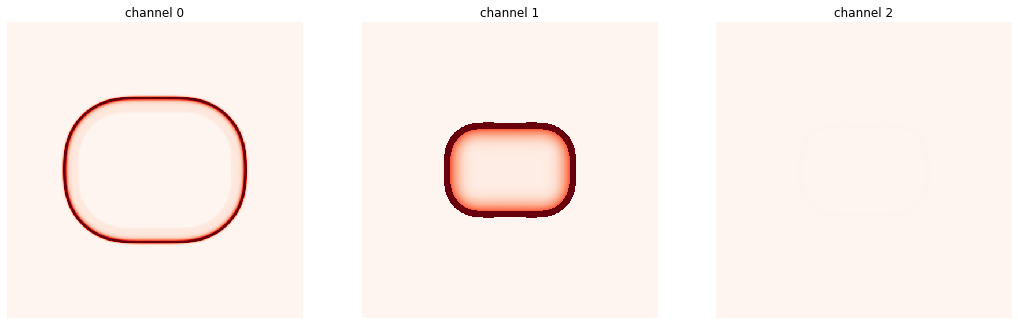

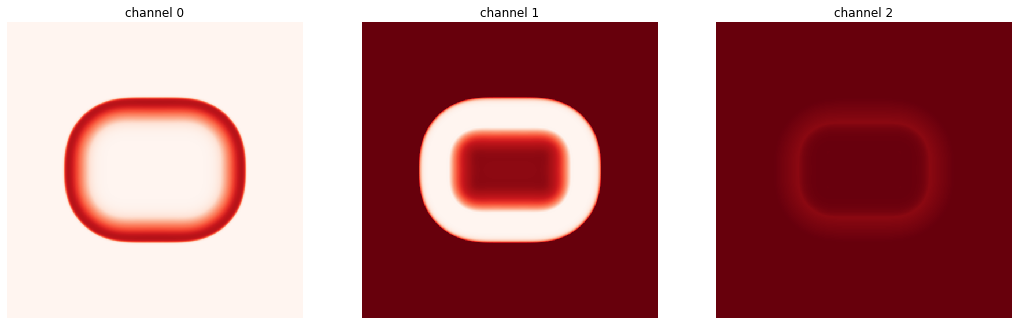

In [45]:
# txt = np.load('Data/buffer_test_error.npy')
txt = np.load('Data/buffer_time_origin.npy')
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)
h = 0.1 #timestep size
dtexture_dt = zero_txt
get_time_step(txt, dtexture_dt)

fig, axs = display_texture(dtexture_dt/h, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
fig, (ax1, ax2, ax3) = display_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
#TODO(later): plt.align_ylabels(axs=axs)

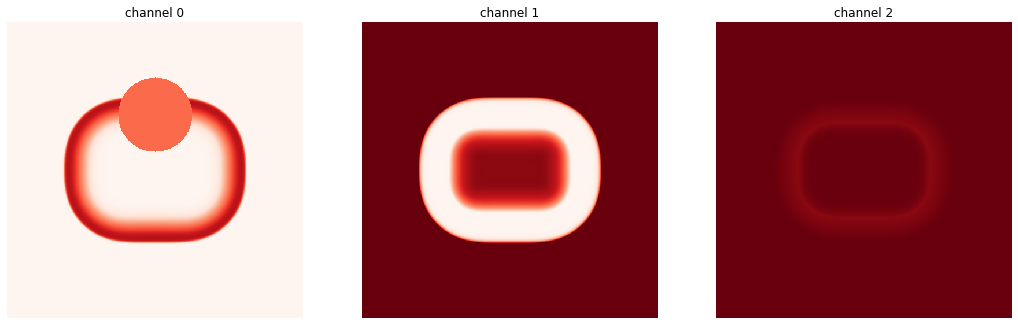

In [46]:
#perturb the buffer at the origin
save = True
save_file_name = 'buffer_time_origin_primed_with_circle6'
save_dir = f"Figures/{save_file_name}.png"
image = txt.copy()

#circle perturbation
color_within_range(x0=256,y0=128+32,r=64, out=image, val=0.5)
# color_within_range(x0=256,y0=128+32,r=32, out=image, val=1.)

#bar perturbation
# set_voltage_in_box(image,
#     min_y=128 + 0,max_y=128 + 32,
#     min_x=256 - 32,max_x=256 + 32,
#     width=512,height=512,value=10.0)
fig, (ax1, ax2, ax3) = display_texture(image, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
if save:
    fig.savefig(save_dir)
    np.save(f'Data/{save_file_name}.npy', image)
    np.save(f'Data/{save_file_name}.npz', image)
    np.savez_compressed(f'Data/{save_file_name}_compressed.npz', image)
else:
    fig.show()
#TODO :switch the x's and y's to correspond to the picture

# _load the reproducibly initialized buffer_
_load the origin with the desired perturbation_<br>
`txt =  np.load('Data/buffer_time_origin_primed.npy')`<br>
_observe an absense of tips are initial after perturbation_

In [3]:
#reinitialize perturbed origin
# lst_x, lst_y = ([], [])
# lst_tip_states = []
tip_state_lst = []
tme = 0
sigma = 3
threshold = 0.6
# load txt
print('loading initial buffer...')
perturb = f'chaos_circle6_sigma_{sigma}_threshold_{threshold}_wrapping_true'
print(f"perturb = {perturb}.")
# txt = np.load(f'Data/buffer_chaos_circle6_sigma_2_at_time_1800.2.npy')
txt = np.load(f'Data/buffer_time_origin_primed_with_circle6.npy')
# txt = np.load(f'Data/buffer_circle6_at_time_3012.8.npy')  #made spiral defect chaos!
# txt = np.load(f'Data/buffer_time_origin_primed_with_{perturb}.npy')
# txt = np.load('Data/buffer_time_origin_primed.npy')
# txt = np.load('Data/buffer_time_origin_primed_with_bar.npy')
describe(txt)
width, height, channel_no = txt.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)
dtexture_dt = zero_txt.copy()
get_time_step(txt, dtexture_dt)

#calculate raw contour field for contours
img_nxt = txt[..., 0]

img_inc = ifilter(dtexture_dt[..., 0])  #mask of instantaneously increasing voltages 
img_inc = filters.gaussian(img_inc,sigma=sigma, mode='wrap')
contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
contours_inc = measure.find_contours(img_inc, level=threshold)#,fully_connected='low',positive_orientation='low')

#tip locating for stable parameters
# img_inc = (img_nxt * ifilter(dtexture_dt[..., 0]))**2  #mask of instantaneously increasing voltages 
# img_inc = filters.gaussian(img_inc,sigma=1.)#,truncate=1.0)
# contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
# contours_inc = measure.find_contours(img_inc, level=0.0005)#,fully_connected='low',positive_orientation='low')

# x_lst, y_lst = tips_to_list(get_tips(contours_raw, contours_inc))
# len(x_lst)
# n_lst, x_lst, y_lst = enumerate_tips(get_tips(contours_raw, contours_inc))
# n_lst, x_lst, y_lst = get_tips(contours_raw, contours_inc)
# tip_states = {'n':n_lst,'x':x_lst,'y':y_lst}
# print(f"tip_states are {tip_states}.")
# # return {'tme':tme,'tip_states':tip_states}
# #TODO: generator expression yield {'tme':tme,'tip_states':tip_states}

tips = get_tips(contours_raw, contours_inc)
print(f"\n number of type 1 contour = {len(contours_raw)},\tnumber of type 2 contour = {len(contours_inc)},")
print(f"""the topological tip state is the following:
{tips[0]}""")
print(f"""x position of tips: {tips[1]}""")
print(f"""y position of tips: {tips[2]}""")

loading initial buffer...
perturb = chaos_circle6_sigma_3_threshold_0.6_wrapping_true.
for channel 0,
	max value: 0.8220734919420856
	min value: -5.842994007759086e-09
	mean value: 0.09040495575159081
	
for channel 1,
	max value: 1.0
	min value: 4.2730396698647395e-07
	mean value: 0.8207531354970061
	
for channel 2,
	max value: 0.9999357315470903
	min value: 0.9255846617243946
	mean value: 0.9930852439857958
	

 number of type 1 contour = 1,	number of type 2 contour = 3,
the topological tip state is the following:
[(0, 1)]
x position of tips: [[158.55025968346234, 158.66373381073967]]
y position of tips: [[189.3101674756501, 322.2765328908191]]


# example: _step forward in time and get the spiral tips_

<img alt="" src="Figures/ex1.png" style="height:600px;width:500px" />

<img alt="" src="Figures/ex2.png" style="height:600px;width:500px" />

<img alt="" src="Figures/ex3.png" style="height:600px;width:500px" />

In [19]:
# from numba import vectorize, float64, int32, int64, float32
# @vectorize([int32(int32, int32),
#             int64(int64, int64),
#             float32(float32, float32),
#             float64(float64, float64)])

#     for x in x_lst:
#         return 1. if x > 0 else 0.
# ifilter(txt[...,0])
# del state
# tip_state_lst = []


# _integrate explicitely in time for nsteps_

In [4]:
##Change: 6pm 5.27.2020 - changed outputs from lists to tuples for easier parsing

#integrate explicitely in time
timing = False
recording = True
h = 0.1
nsteps = 36*10**3#36*10**3#36*10**3#nonparallel currently runs at 6000 steps per hour #np.int64(tmax/h)# tmax = 1
start = time.time()
tip_states = None
state = np.zeros((512,512,4),dtype=np.float64)
# if timing:
#     start = time.time()
for step in range(nsteps):
    if not recording:
        #integrate explicitely in time
        time_step(txt, h=h, zero_txt=zero_txt)
        tme += h
#         if timing:
#             print(f"time stepped in {time.time()-start:.4f} seconds.")
#             start = time.time()
    if recording:
        #calculate discrete flow map
        dtexture_dt = zero_txt.copy()
        get_time_step(txt, dtexture_dt)
        
        #integrate explicitely in time by the forward euler method
        txt += h*dtexture_dt
        tme += h
        
        #compute contours here
        #calculate raw contour field for contours
        img_nxt = txt[..., 0].copy()

        # get_tissue_state(texture=txt, out=state[...])
        #         if timing:
        #             print(f"filters computed in {time.time()-start:.4f} seconds.")
        #             start = time.time()
        #compute contours here   
        #plot contours, if any.  type 1 = contours_raw, type 2 = contours_inc
        # img_inc = (img_nxt * ifilter(dtexture_dt[..., 0]))**2  #mask of instantaneously increasing voltages 
        # img_inc = filters.gaussian(img_inc,sigma=1.)#,truncate=1.0)
        
        #plot contours, if any.  type 1 = contours_raw, type 2 = contours_inc
        img_inc = ifilter(dtexture_dt[..., 0])  #mask of instantaneously increasing voltages 
        img_inc = filters.gaussian(img_inc,sigma=sigma, mode='wrap')
        contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
        contours_inc = measure.find_contours(img_inc, level=threshold)#,fully_connected='low',positive_orientation='low')

        #the following line doesn't work, the kernel filters.gaussian is actually larger than 1 pixel radius. get_inc(dtexture_dt[..., 0],img_inc)
#         contours_raw, contours_inc = get_contours(img_nxt,img_inc)
#         if timing:
#             print(f"contours computed in {time.time()-start:.4f} seconds.")
#             start = time.time()

        #compute spiral tips from the corssings 
        n_lst, x_lst, y_lst = get_tips(contours_raw, contours_inc)
        tip_state_lst.append({
                    't': float(np.around(tme, 1)),
                    'x': tuple(x_lst),
                    'y': tuple(y_lst),
                    's': tuple(n_lst)})
#         if timing:
#             print(f"results computed/appended in {time.time()-start:.4f} seconds.\n")
    printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
#report the bottom line up front
print(f"time integration complete. time elapsed was {time.time()-start:.2f} seconds")
print(f"current time is {tme:.1f}.")
print(f"number of nan pixel voltages is {np.max(sum(np.isnan(txt[...,0])))}.")
print(f"current max voltage is {np.nanmax(txt[...,0]):.4f}.")
print(f"current max fast variable is {np.nanmax(txt[...,1]):.4f}.")
print(f"current max slow variable is {np.nanmax(txt[...,2]):.4f}.")
n_lst, x_lst, y_lst = get_tips(contours_raw, contours_inc)
tip_states = {'n': n_lst, 'x': x_lst, 'y': y_lst}
# print(f"tip_states are {tip_states}.")
# print(f'current tip state is {tip_states}')
# if len(lst)~=0:
# print(f"number of tips is = {set([len(q) for q in lst_x[-1]])}.") #most recent number of tips

if recording:
    tips = get_tips(contours_raw, contours_inc);
    print(f"\n number of type 1 contour = {len(contours_raw)},\tnumber of type 2 contour = {len(contours_inc)},")
    print(f"""the topological tip state is the following:
    {tips[0]}""")
beep(3)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
time integration complete. time elapsed was 18477.08 seconds
current time is 3600.0.
number of nan pixel voltages is 0.
current max voltage is 1.1154.
current max fast variable is 1.0000.
current max slow variable is 1.0000.

 number of type 1 contour = 15,	number of type 2 contour = 13,
the topological tip state is the following:
    [(0, 0), (0, 4), (0, 6), (6, 3), (9, 5), (10, 7), (12, 10), (13, 8), (13, 11)]


0

# plot buffer state with contours and spiral tips

current time is 3600.0
number of type 1 contour = 15,	number of type 2 contour = 13,
the topological tip state is the following: [(0, 0), (0, 4), (0, 6), (6, 3), (9, 5), (10, 7), (12, 10), (13, 8), (13, 11)]
x coords: [[18.18313261058156], [85.26129885474556, 92.69604793672582, 153.47969879220503, 128.21432796229746], [50.8167287048544], [360.27776230177534, 429.735634740225], [306.41322247721615, 341.50445973969676], [488.57337282025287], [108.2284525609599], [444.20658377946904], [483.0057956315696]]
y coords: [[4.72499669862008], [215.8866104111532, 172.90759708910628, 190.66585354087061, 240.75790779094154], [320.1415396105382], [194.2826892050235, 155.2032739042173], [322.31305448712675, 235.10055372759294], [320.38692404889053], [501.3097495470066], [445.4896987083461], [509.12192597362224]]
file saved at
Data/buffer_chaos_circle6_sigma_3_threshold_0.6_wrapping_true_at_time_3600.0.npy


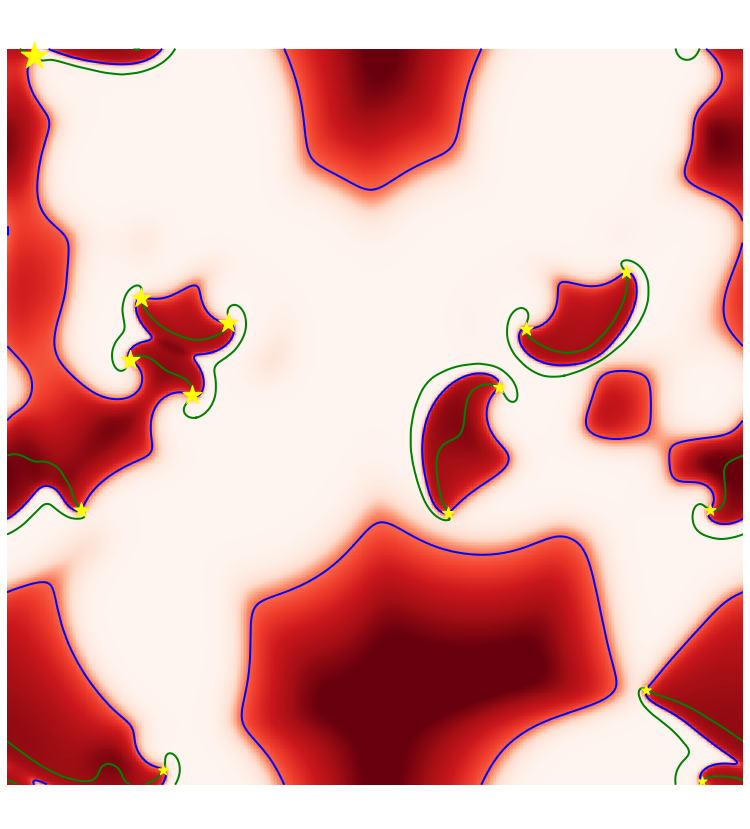

In [6]:
#view/save the buffer with contours and tips plotted
save = True
save_file_name = f'buffer_{perturb}_at_time_{tme:.1f}'
save_dir = f"Figures/{save_file_name}.png"
image = txt.copy()

#compute display data
h = 0.1
# state = np.zeros((512,512,4),dtype=np.float64)
# get_tissue_state(texture=txt, out=state[...])
dtexture_dt = zero_txt.copy()
get_time_step(txt, dtexture_dt)
img_nxt = txt[...,0].copy()
img_inc = txt[...,0].copy()
#plot figure
plt.figure(figsize=(15,15))
plt.imshow(img_nxt,cmap='Reds', vmin=0, vmax=1)
# plt.title("voltage increases with red", fontsize=24)

#plot contours, if any.  type 1 = contours_raw, type 2 = contours_inc
img_inc = ifilter(dtexture_dt[..., 0])  #mask of instantaneously increasing voltages 
img_inc = filters.gaussian(img_inc,sigma=sigma, mode='wrap')
contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
contours_inc = measure.find_contours(img_inc, level=threshold,fully_connected='low',positive_orientation='low')
for n, contour in enumerate(contours_inc):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='g', zorder=2)
for n, contour in enumerate(contours_raw):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='b', zorder=2)
plt.axis('off')

#plot tips, if any
tips = get_tips(contours_raw, contours_inc)
n_values, y_values, x_values = tips
for j in range(len(tips[2])): #nota bene, tips[2] is x_values
    plt.scatter(x = tips[2][j], y = tips[1][j], c='yellow', s=int(800/(j+1)), zorder=3, marker = '*')
print(f"current time is {tme:.1f}")
print(f"number of type 1 contour = {len(contours_raw)},\tnumber of type 2 contour = {len(contours_inc)},")
print(f"""the topological tip state is the following: {n_values}""")
print(f"""x coords: {x_values}""")
print(f"""y coords: {y_values}""")
if save:
    plt.savefig(save_dir)
    np.save(f'Data/{save_file_name}.npy', image)
    print('file saved at')
    print(f'Data/{save_file_name}.npy')
#     np.savez_compressed(f'Data/{save_file_name}.npz', image)
else:
    plt.show()

# *save tip_state_lst as .csv*
`# print(tip_state_lst)# pd.DataFrame(tip_state_lst)
df = pd.DataFrame(tip_state_lst)
perturb='circle6'
df.to_csv(f'Data/tip_log_{perturb}_at_time_{tme:.1f}.csv', index=False)`

In [5]:
save = True
if save:
    # print(tip_state_lst)# pd.DataFrame(tip_state_lst)
    df = pd.DataFrame(tip_state_lst)
    df.to_csv(f'Data/tip_log_{perturb}_at_time_{tme:.1f}.csv', index=False)
print('saved to:')
print(f'Data/tip_log_{perturb}_at_time_{tme:.1f}.csv')

saved to:
Data/tip_log_chaos_circle6_sigma_3_threshold_0.6_wrapping_true_at_time_3600.0.csv


### _accuracy benchmark_
- upon visual inspection, the current tip detection method appears robust after waiting a sufficient amount of time after the right perturbation
- TODO: plot spiral tip number as a function of time for an overnight data run.  the topological measure should work if there's any false positive intersections between a given contour pair. 

### _speed benchmark_
- $\sim6,000$ time steps per hour of runtime _with tip recording_
- $\sim60,000$ steps per hour of runtime _with tip recording_
- get_tips is still taking ~99% of the runtime.  It looks like intersection is the worst offender

In [4]:
import numba
a = numba.typed.List()
a.append(1.2)


[1.2]

TypeError: __init__() takes 1 positional argument but 2 were given

In [95]:
# # @njit
# def get_tips(contours_raw, contours_inc):
#     '''returns tips with indices of parent contours'''
#     n_list = List(); x_lst = List(); y_lst = List()
#     for n1, c1 in enumerate(contours_raw):
#         for n2, c2 in enumerate(contours_inc):
#             x1, y1 = (c1[:, 0], c1[:, 1])
#             x2, y2 = (c2[:, 0], c2[:, 1])
#             x, y = intersection(x1, y1, x2, y2)
#             # if a tip has been detected, save it and its contour id's
#             if len(x)>0:
#                 s = (n1,n2)
#                 x = list(x)
#                 # x.sort()
#                 y = list(y)
#                 # y.sort()
#                 n_list.append(s)
#                 x_lst.append(x)
#                 y_lst.append(y)
#     return n_list, x_lst, y_lst
# contours_raw, contours_inc = get_contours(img_nxt,img_inc)
# retval = get_tips(contours_raw, contours_inc)

 - get tips takes 1.57s using python lists
 - get tips takes 1.5s using numba lists

- time stepped in 1.6616 seconds.
- filters computed in 0.0573 seconds.
- contours computed in 0.0226 seconds.
- results computed/appended in 1.4652 seconds.

- time stepped in 0.0626 seconds.
- filters computed in 0.0639 seconds.
- contours computed in 0.0109 seconds.
- results computed/appended in 0.7851 seconds.

# scratchwork for saving tips

In [186]:
# import pickle

In [96]:
# #save lst of tips when desired
# save = False
# lst = tip_state_lst[-2:]
# #get equally spaced t_values
# if save:
#     out = lst
#     observation_no = len(out)
#     t_now = np.around(tme, 1)  #current time in units consistent with timestep, h
#     t_init = np.around(t_now - (observation_no + 1) * h, 1)
#     t_values = np.arange(t_init, t_now, h) + h
#     print(f"t_values are {t_values}")
#     # assert(len(t_values)==len(x_values)==len(y_values))
#     #loop through the spiral tips #TODO: @njit if saving is needed frequently.  #TODO(later): consider involving nvme
#     index_values = []

#     num_tips_values = []
#     for n, (t, yx) in enumerate(list(zip(t_values, out))):
#         #DONE: form trajectories by sorting by distance from previous frame

#         #TODO(later): compute additional features using lib calls here
#         num_tips = len(list(x))
#         #print out the data
#         #     print((n, t, num_tips, list(x), list(y)))
#         if ~(len(lst)==0):
#             print(f"number of tips is = {set([len(q) for q in lst_x])}.") #most recent number of tips

#         #append the data to feature lists
#         index_values.append(n)
#         x_values.append(x)
#         y_values.append(y)
#         num_tips_values.append(num_tips)

#     #TODO: save as a pandas dataframe
#     # df = pd.DataFrame(save_dir, index='index')

In [ ]:
# len(x_values)
# df = pd.DataFrame(dict(zip(columns,(t_values,num_tips_values,x_values,y_values))), index=index_values)
# df.head()

In [ ]:
# #define save location
# save = False
# columns = ['t', 'num_tips','x','y']
# save_dir = f"Data/tip_log/{t_init+h:.1f}_through_{t_now}.csv"
# csv_props = {'mode':'w', 'tupleize_cols':None,"index_label":'index'}
# df.to_csv(save_dir,**csv_props)
# if save:
#     print(f"saved to {save_dir}.")

# _plot each channel of the latest texture_

In [ ]:
#plot contours
saving = True
# perturb = 'circle6'
# print(f"tip_states are {tip_states}.")

#compute current texture rate of change
h = 0.1
dtexture_dt = zero_txt.copy()
get_time_step(txt, dtexture_dt)
state = np.zeros((512,512,4),dtype=np.float64)
get_tissue_state(texture=txt, out=state[...])

#figure
fig, ((a1, a2, a3),(a4, a5, a6),(a7, a8, a9)) = plt.subplots(3,3,figsize=(20,20));
axs = (a1, a2, a3, a4, a5, a6, a7, a8, a9)

#plot textures
a1, a2, a3 = plot_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1), ax1=a1, ax2=a2, ax3=a3,
                          title0 = 'voltage',
                          title1 = 'fast variable',
                          title2 = 'slow variable');
a4, a5, a6 = plot_texture(dtexture_dt/h, vmins=(0, 0, 0), vmaxs=(1, 1, 1), ax1=a4, ax2=a5, ax3=a6,
                          title0 = 'change in voltage',
                          title1 = 'change in fast variable',
                          title2 = 'change in slow variable');
a7, a8, a9 = plot_texture(state[...,1:],  vmins=(-.01, -.01, -.01), vmaxs=(.01, .01, .01),ax1=a7, ax2=a8, ax3=a9,
                          title0 = 'fast inward current (Na$^+$)',
                          title1 = 'slow outward current (K$^{+}$)',
                          title2 = 'slow inward current (Ca$^{2+}$)');

#plot contours and tips , if any
for ax in axs:
    plot_contours(ax, contours_raw, contours_inc, color_raw='green', color_inc='blue', lw=1)
    for j in range(len(tips[2])): #nota bene, tips[2] is x_values
        ax.scatter(x = tips[2][j], y = tips[1][j], c='yellow', s=int(200/(j+1)), zorder=3, marker = '*')
if saving:
    save_dir = f"Figures/buffer_array_{perturb}_time_{tme:.1f}.png"
    print(f"saving in {save_dir}.")
    fig.savefig(save_dir, dpi = 512/10)
    fig.savefig(save_dir.replace('.png', '.svg'))
else:
    fig.show()

In [93]:
# #DONE: compute contours that intersect
# # ifilter = np.vectorize(lambda x,x_old: 1. if x>x_old else 0.)
# img_nxt = txt[..., 0]
# img_inc = img_nxt*ifilter(dtexture_dt[...,0])#,zero_txt[...,0]+0.01) #mask of increasing cells instantaneously
# contours_inc = measure.find_contours(img_inc, level=0.4)
# contours_raw = measure.find_contours(img_nxt,level=0.8,fully_connected='low',positive_orientation='low')



        
# for ax,axl in list(zip(axs,axsl)):
#     ax = plot_contours(axl, contours_raw, contours_inc)

#compute tip_states
# n_lst, x_lst, y_lst = enumerate_tips(get_tips(contours_raw, contours_inc))
# tip_states = {'n':n_lst,'x':x_lst,'y':y_lst}
# print(f"tip_states are {tip_states}.")    
# if saving:
#     save_dir1 = f"Figures/describe_buffer_{perturb}_top_time_{tme:.1f}.png"
#     plt.savefig(save_dir1, dpi=512 / 10)
# if saving:
#     save_dir2 = f"Figures/describe_buffer_{perturb}_bottom_time_{tme:.1f}.png"
#     plt.savefig(save_dir2, dpi=512 / 10)
# else:
#     plt.show()

#plot currents Ifi, Iso, Isi

# saving = False
# tips = get_tips(
# contours_raw
# , 
# enumerate_tips( 
# get_tips(contours_raw,contours_inc)
# contours_raw = measure.find_contours(img_nxt,level=5,fully_connected='low',positive_orientation='low')

# fig, axs = display_texture(state[...,1:],  vmins=(-.01, -.01, -.01), vmaxs=(.01, .01, .01),
#                           title0 = 'fast inward current (Na$^+$)',
#                           title1 = 'slow outward current (K$^{+}$)',
#                           title2 = 'slow inward current (Ca$^{2+}$)');

# #TODO: compute contours that intersect
# img_nxt = txt[..., 0]
# # img_inc = dtexture_dt[..., 0]
# img_inc = state[...,1]
# # img_inc = dtexture_dt[..., 0]
# # contours_raw = measure.find_contours(img_nxt,level=5,fully_connected='low',positive_orientation='low')
# # contours_inc = measure.find_contours(img_inc, level=.5)

# #plot contours, if any
# for ax in axs:
#     plot_contours(ax, contours_raw, contours_raw, lw=1)
#     plot_contours(ax, contours_inc, contours_inc, lw=1)
# axs[1].set_title('ion channel currents\nchannel 1')
# # len(contours_inc)!=0
# # for c in contours_inc:
# #     print(c)
# # # )
# # len(tips)==0

#plot contours and tips , if any
# for ax in axs:
#     plot_contours(ax, contours_raw, contours_inc, color_raw='green', color_inc='blue', lw=1)
#     for j in range(len(tips[2])): #nota bene, tips[2] is x_values
#         ax.scatter(x = tips[2][j], y = tips[1][j], c='yellow', s=int(200/(j+1)), zorder=3, marker = '*')
# if saving:
#     save_dir = f"Figures/buffer_array_{perturb}_time_{tme:.1f}.png"
#     print(f"saving in {save_dir}.")
#     fig.savefig(save_dir, dpi = 512/10)
# else:
#     fig.show()

In [88]:
# #compute current texture rate of change/tissue current
# h = 0.1
# dtexture_dt = zero_txt.copy()
# get_time_step(txt, dtexture_dt)
# state = np.zeros((512,512,4),dtype=np.float64)
# get_tissue_state(texture=txt, out=state[...])

# #calculate raw contour field for contours
# img_nxt = txt[...,0]
# #calculate nonraw field for contours
# # ifilter = np.vectorize(lambda x,x_old: 1. if x>x_old else 0.)
# img_inc = img_nxt*ifilter(dtexture_dt[...,0])#,zero_txt[...,0]+0.0) #mask of increasing cells instantaneously

# # img_inc = img_nxt*ifilter(state[...,0],zero_txt[...,0]-0.0) #mask of increasing cells instantaneously
# # img_inc = img_nxt*ifilter(dtexture_dt[...,0],zero_txt[...,0]+0.0) #mask of increasing cells instantaneously
# # img_inc = filters.gaussian(img_inc,sigma=1,truncate=1.0)

# #plot figure
# plt.figure(figsize=(15,15))
# plt.imshow(img_nxt,cmap='Reds')
# # plt.imshow(img_inc,cmap='Reds')


# #plot contours, if any
# contours_inc = measure.find_contours(img_inc, level=0.5)
# contours_raw = measure.find_contours(img_nxt, level=0.8)
# for n, contour in enumerate(contours_inc):
#     plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='b', zorder=2)
# for n, contour in enumerate(contours_raw):
#     plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='g', zorder=2)
# plt.axis('off')

In [492]:
# #TODO: compute contours that intersect
# save=False

# #compute current texture rate of change/tissue current
# h = 0.1
# dtexture_dt = zero_txt.copy()
# get_time_step(txt, dtexture_dt)
# state = np.zeros((512,512,4),dtype=np.float64)
# get_tissue_state(texture=txt, out=state[...])

# #calculate raw contour
# # img_nxt = txt[..., 0]          #green raw voltage threshold
# # contours_raw = measure.find_contours(img_nxt,level=5, fully_connected='low', positive_orientation='low')

# #calculate nonraw contour
# # ifilter = np.vectorize(lambda x,x_old: 1. if x>x_old else 0.)
# # img_inc = ifilter(state[...,1],zero_txt[...,0]+0.01) #mask of increasing cells instantaneously

# # img_inc = ifilter(dtexture_dt[...,0],zero_txt[...,0]+0.01) #mask of increasing cells instantaneously
# # img_inc = ifilter(dtexture_dt[...,0],zero_txt[...,0]+0.01) #mask of increasing cells instantaneously
# # img_inc = filters.gaussian(img_inc,sigma=1,truncate=1.0)
# # img_inc = state[..., 1]  #blue  other threshold
# # img_inc = dtexture_dt[..., 1]  #blue  other threshold

# #detect whether a pixel is increasing or decreasing.  
# # ifilter = np.vectorize(lambda x,x_old: 1. if x>x_old else 0.)
# # img_inc = ifilter(dtexture_dt[...,0],1+zero_txt[...,0]) #mask of increasing cells between a few frames
# # contours_inc = measure.find_contours(img_inc, level=5, fully_connected='low', positive_orientation='low')

# #get contours by a marching squares algorithm (which can be parallelized to increase performance in theory)
# # contours_raw = measure.find_contours(image_nxt, level=0.3, fully_connected='low', positive_orientation='low')
# # contours_edge = measure.find_contours(inc, 0.5)

# #plot zoomed in contours
# save = False
# fig, ax  = plt.subplots(figsize=(16, 16));
# plot_contours(ax, contours_raw, contours_inc)
# ax.axis('off')
# if save:
#     save_dir = f"Figures/contours_time_{tme:.1f}.png"
#     print(f"saving in {save_dir}.")
#     fig.savefig(save_dir, dpi = 512/16, transparent=True)

# preliminary plot of spiral tip number as a function of time

In [97]:
# Data/tip_log_chaos_circle6_sigma_2_wrapping_at_time_1800.0.csv
# data_dir = 'Data/tip_log_circle6_at_time_3012.8.csv'
# data_dir = 'Data/tip_log_circle6_params_changed_at_time_1800.0.csv'
data_dir = 'Data/tip_log_chaos_circle6_sigma_2_at_time_3600.2.csv'
df = pd.read_csv(data_dir)
df.head()

,s,t,x,y
0,"[(3, 1), (4, 2)]",1800.3,"[[196.8407840951389, 209.83820215863255], [211...","[[83.46699026764462, 141.80605421626368], [365..."
1,"[(3, 1), (4, 2)]",1800.4,"[[197.02152849851242, 209.81171765379497], [21...","[[83.3420417531074, 141.81962461562725], [365...."
2,"[(3, 1), (4, 2)]",1800.5,"[[196.98427021616945, 209.8325819711444], [211...","[[83.31211707898439, 141.8843817384126], [365...."
3,"[(3, 1), (4, 2)]",1800.6,"[[197.13729601023485, 209.8233718079548], [211...","[[83.21649072334598, 141.91664112944588], [365..."
4,"[(3, 1), (4, 2)]",1800.7,"[[197.08971953279817, 209.89878646896085], [21...","[[83.18586057246104, 142.03296347332005], [365..."


In [98]:
t_values = []
n_values = []
for j in range(df.t.size):
    t = df.iloc[j].t
    t_values.append(t)
    x = df.iloc[j].x
    n = x.replace('[','').replace(']','').count('.')
    n_values.append(n)

Text(0, 0.5, 'number of spiral tips')

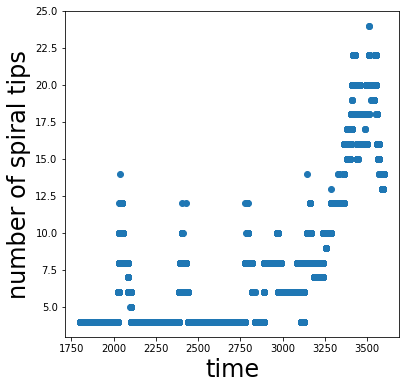

In [99]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=t_values, y=n_values)
dn_values = np.diff(np.array(n_values))
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('number of spiral tips', fontsize=24)

In [100]:
dn_values = np.diff(np.array(n_values))
#select the birth/deaths values that are odd
list(set(dn_values))
# plt.hist(np.diff(np.array(n_values)), bins = 2)

[0, 1, 2, 4, 6, 8, -1, -4, -2]

# TODO: add comfortable user interface for generating tip data files -  i.e. for
1. loading an initialized texture, 
1. time stepping nsteps at a time step of h, 
1. regularly appending spiral tip locations to .txt file
    - also append local state information, voltage, fast/slow variable, and laplacian of voltage

# question: how to optimize the consistency spiral tip locations between frames?
_(i.e.?) what's the best threshold for either contour?_<br>
- TODO: Address ^this by plotting spiral tip features as a function of time for 
1. the simple easy case of two isolated spiral tips
2. the case of spiral defect chaos
3. times shortly after an external perturbation
- TODO: plot _versus_ time for all spiral tips, 
    - kinematics: x position, y position, total tip number, 
        - angular velocity, velocity, radius, chirality
    - kinetics: voltage, Ifi, Isi, Iso
    - ^those relative to the values for the entangled tip
- TODO: See how ^these values change for different choices in contour thresholds

# TODO: test whether topological number state is robust to contours that touch the periodic boundary.  My guess is no, and that it is nontrivial to test this.  Thankfully the easiest case of two isolated tips always has at least one string touching

# Appendix/et cetera/TODO(later)

## completed: _intersection of two curves_
one call to intersect from lib finds two spiral tips in ~20ms.  not bad

9
8
[(4, 3)]


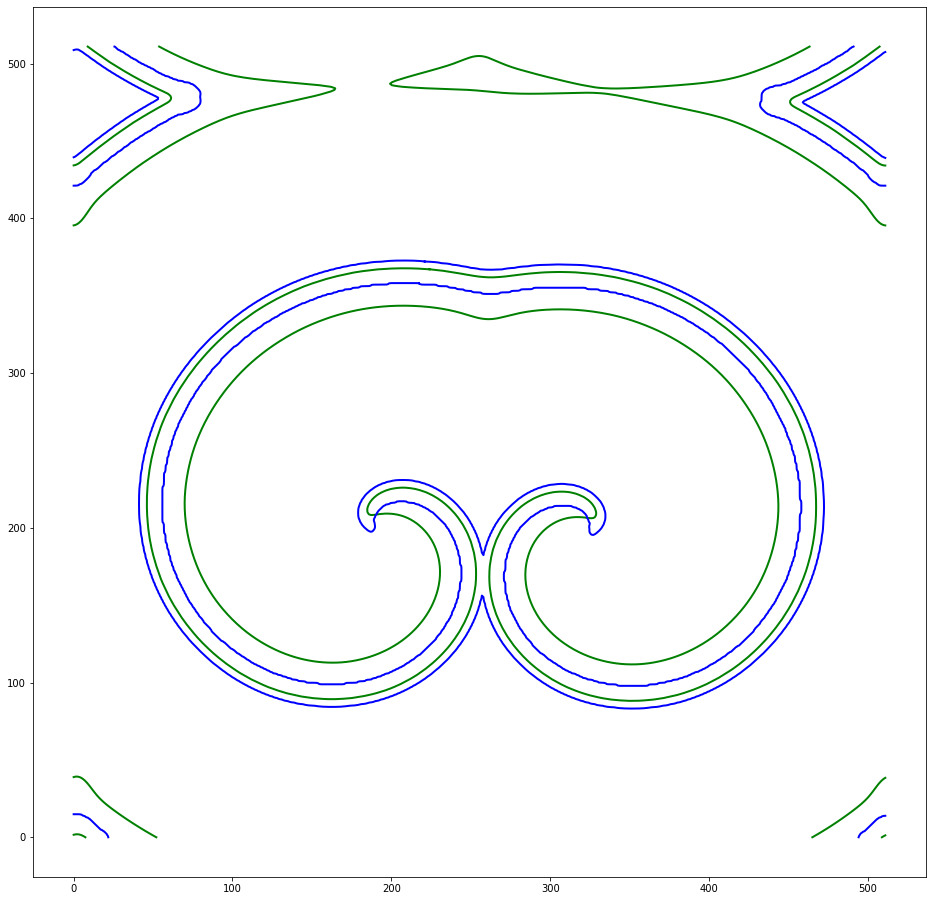

In [422]:
print(len(contours_raw))
print(len(contours_inc))
fig, ax  = plt.subplots(figsize=(16, 16));
plot_contours(ax, contours_raw, contours_inc)
# tips = get_tips( contours_raw, contours_inc)
print(tips[0])

In [18]:
# from lib.intersection import *
# enumerate_tips(
# list_tips(
# def list_tips

# a, b = 1, 2
# phi = np.linspace(3, 10, 100)
# x1 = a * phi - b * np.sin(phi)
# y1 = a - b * np.cos(phi)

# x2 = phi
# y2 = np.sin(phi) + 2
# x, y = intersection(x1, y1, x2, y2)

# plt.plot(x1, y1, c='r')
# plt.plot(x2, y2, c='g')
# plt.plot(x, y, '*k')
# plt.show()
# tips[1][2]

In [19]:
# dtexture_dt = np.zeros((width, height, channel_no), dtype=np.float64)
# get_time_step(txt, dtexture_dt)
# display_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
# display_texture(dtexture_dt, vmins=(-1, -1, -1), vmaxs=(1, 1, 1))
# describe_texture(txt[..., 0])
# describe_texture(txt[..., 1])
# describe_texture(txt[..., 2])

# c1  = contours_raw[0]; c2 = contours_inc[2];
# x1, y1 = (c1[:, 0], c1[:, 1])
# x2, y2 = (c2[:, 0], c2[:, 1])
# x_array, y_array = intersection(x1, y1, x2, y2)

In [ ]:
# [contours_inc[2]]
# #get contours
# if 'contours_raw' not in globals():
#     contours_raw=[]
# if 'contours_edge' not in globals():
#     contours_edge=[]
# assert(type(contours_raw))
# assert(type(contours_raw))


## TODO: set running for awhile, while recording spiral tips

## TODO?: make/test rotate function for exception handling in intersect()
- Nota bene: I'm not observing warning messages anymore from intersect().  Did it's problem go away with improved thresholding?
_application: retry funny intersection calls with a 45º rotation_<br>
`scipy.ndimage.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)`

In [ ]:
`scipy.ndimage.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)`

## completed: _make circle perturbation of zero_txt_

In [137]:
# @njit
# def color_within_range(x0,y0,r, out, val=1.0, width=512,height=512):
#     for x in range(width):
#         dx = x-x0
#         for y in range(height):
#             dy = y-y0
#             if np.sqrt(dx**2+dy**2)<=r:
#                 out[y,x,0] = val
# circ_txt = txt.copy()
# color_within_range(x0=256,y0=128+32,r=32, out=circ_txt, val=1.)
# display_texture(circ_txt)

In [124]:
describe_texture?

# the biggest time sink by far
the get_tips function contributes 1.9s out of 1.9s of runtime.  of that, 1.65 of the seconds are from intersection(), which is parallelizeable.

In [78]:
# #what tip detection algorithm works best for algorithm two?
# # @jit
# def get_contours(img_nxt,img_inc):
#     contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
#     contours_inc = measure.find_contours(img_inc, level=0.9)#,fully_connected='low',positive_orientation='low')
#     return contours_raw, contours_inc

# from numba.typed import List

# ###TODO: use the nested datatypes from numba
# # @jit
# def get_tips(contours_raw, contours_inc):
#     '''returns tips with indices of parent contours'''
#     n_list = []; x_lst = []; y_lst = []
#     start = time.time()
#     was = 0
#     for n1, c1 in enumerate(contours_raw):
#         for n2, c2 in enumerate(contours_inc):
#             x1, y1 = (c1[:, 0], c1[:, 1])
#             x2, y2 = (c2[:, 0], c2[:, 1])
#             # tmp = intersection(x1, y1, x2, y2)
#             start = time.time()
#             x, y = intersection(x1, y1, x2, y2)
#             was += start-time.time()
#             # if a tip has been detected, save it and it's contour id's
#             if len(x)>0:     
#                 s = (n1,n2)
#                 x = list(x)
#                 # x.sort()
#                 y = list(y)
#                 # y.sort()
#                 # tmp = (s,x,y)
#                 # tips.append(tmp)
#                 n_list.append(s)
#                 x_lst.append(x)
#                 y_lst.append(y)
#     print(f"time appending was {was}.")
#     return n_list, x_lst, y_lst
# contours_raw, contours_inc = get_contours(img_nxt,img_inc)
# retval = get_tips(contours_raw, contours_inc)
# print(retval)
# # #plot contours, if any.  type 1 = contours_raw, type 2 = contours_inc
# # img_inc = ifilter(dtexture_dt[..., 0])  #mask of instantaneously increasing voltages 
# # img_inc = filters.gaussian(img_inc,sigma=1.)
# # contours_raw, contours_inc = get_contours(img_nxt,img_inc)

# # X1 = np.arange(9).reshape(3,3)
# # X1.min(axis=1)
# # x1 = X1
# # _rect_inter_inner(x1, x1)
# # np.c_[x1[:-1], x1[1:]]
# # np.concatenate((x1[:-1], x1[1:]),axis=1)
# # # np.c_?
# np.array(np.min(contours_raw[0][:, 0]))
# contours_raw[0][:, 0].min(axis=0)

# # @njit
# def _rect_inter_inner(x1, x2):
#     # assert(type(x1)==np.ndarray)
#     # assert(type(x2)==np.ndarray)
#     n1 = x1.shape[0]-1
#     n2 = x2.shape[0]-1
#     X1 = np.concatenate((x1[:-1], x1[1:]),axis=1)#np.c_[x1[:-1], x1[1:]]
#     X2 = np.c_[x2[:-1], x2[1:]]
#     S1 = np.tile(X1.min(axis=1), (n2, 1)).T
#     S2 = np.tile(X2.max(axis=1), (n1, 1))
#     S3 = np.tile(X1.max(axis=1), (n2, 1)).T
#     S4 = np.tile(X2.min(axis=1), (n1, 1))
#     return S1, S2, S3, S4